In [4]:
import pandas as pd

In [5]:
data=pd.read_csv("/content/data_moods.csv")

In [6]:
data.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [7]:
data.isna().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [9]:
data=data.drop(columns=["id","name","album","artist","release_date"],axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        686 non-null    int64  
 1   length            686 non-null    int64  
 2   danceability      686 non-null    float64
 3   acousticness      686 non-null    float64
 4   energy            686 non-null    float64
 5   instrumentalness  686 non-null    float64
 6   liveness          686 non-null    float64
 7   valence           686 non-null    float64
 8   loudness          686 non-null    float64
 9   speechiness       686 non-null    float64
 10  tempo             686 non-null    float64
 11  key               686 non-null    int64  
 12  time_signature    686 non-null    int64  
 13  mood              686 non-null    object 
dtypes: float64(9), int64(4), object(1)
memory usage: 75.2+ KB


In [11]:
data.mood.unique()

array(['Happy', 'Sad', 'Energetic', 'Calm'], dtype=object)

In [12]:
data["mood"]=data["mood"].map({"Happy":0,"Sad":1,"Energetic":2,"Calm":3})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        686 non-null    int64  
 1   length            686 non-null    int64  
 2   danceability      686 non-null    float64
 3   acousticness      686 non-null    float64
 4   energy            686 non-null    float64
 5   instrumentalness  686 non-null    float64
 6   liveness          686 non-null    float64
 7   valence           686 non-null    float64
 8   loudness          686 non-null    float64
 9   speechiness       686 non-null    float64
 10  tempo             686 non-null    float64
 11  key               686 non-null    int64  
 12  time_signature    686 non-null    int64  
 13  mood              686 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 75.2 KB


In [14]:
x=data[["tempo","mood"]]

In [15]:
data["tempo"].shape

(686,)

In [16]:
data["mood"].shape

(686,)

In [17]:
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter("ignore")

In [18]:
inertia=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i).fit(x)
  inertia.append(kmeans.inertia_)

In [19]:
min(inertia),max(inertia)

(13183.897072214646, 576074.5519351955)

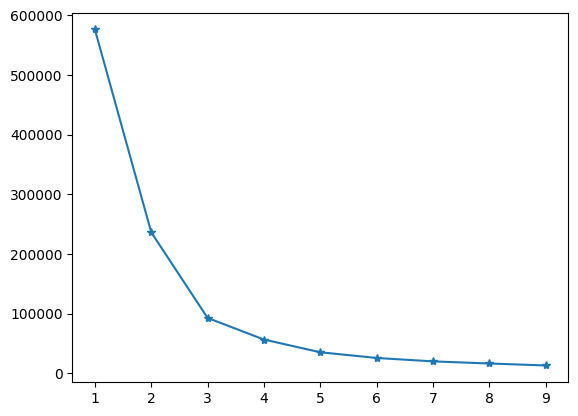

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),inertia,"-*")

In [21]:
kmeans=KMeans(n_clusters=3).fit(x)

In [22]:
ypredict=kmeans.predict(x)

In [23]:
centroids=kmeans.cluster_centers_

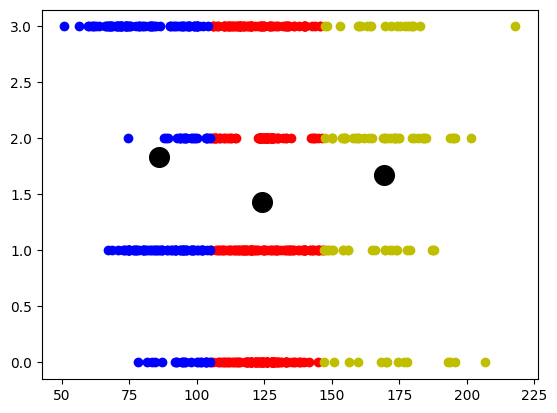

In [24]:
plt.scatter(x.loc[ypredict == 0,"tempo"], x.loc[ypredict==0, "mood"], c = "r", label = "Cluster 1" )
plt.scatter(x.loc[ypredict == 1,"tempo"], x.loc[ypredict==1, "mood"], c = "b",label = "Cluster 2" )
plt.scatter(x.loc[ypredict == 2,"tempo"], x.loc[ypredict==2, "mood"], c = "y",label = "Cluster 3" )
plt.scatter(centroids[:,0],centroids[:,1], c= "black", s=200, label = "Centroids" )

In [25]:
####USING PCA

In [26]:
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter("ignore")

In [27]:
init = []
for i in range(1,10):
  kmeans=KMeans(n_clusters=i).fit(data)
  init.append(kmeans.inertia_)

In [28]:
min(inertia),max(inertia)

(13183.897072214646, 576074.5519351955)

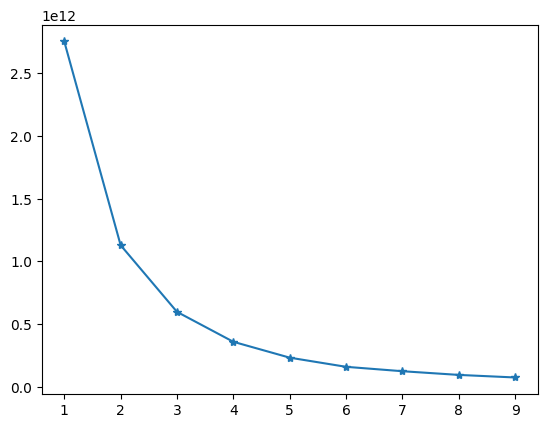

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),init,"-*")

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(2)

In [32]:
reduced = pd.DataFrame(pca.fit_transform(data), columns = ["PCA1", "PCA2"])

In [33]:
reduced.head()


,PCA1,PCA2
0,157474.513708,0.104855
1,97008.514611,1.267884
2,-3845.486026,17.489427
3,11208.516055,71.932580
4,46208.514311,51.776348


In [34]:
kmeans = KMeans(4).fit(reduced)
ypred = kmeans.predict(reduced)

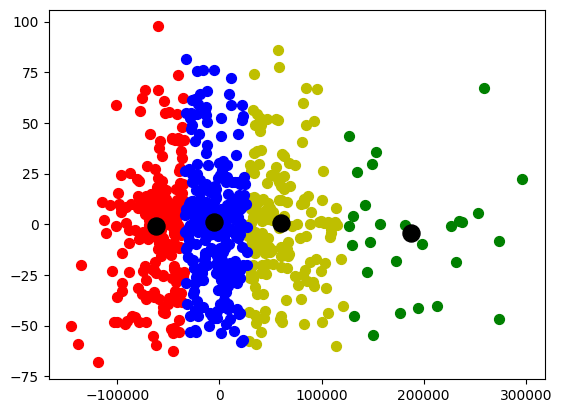

In [35]:
plt.scatter(reduced.loc[ypred == 0,"PCA1"],reduced.loc[ypred == 0,"PCA2"], c = "r", label = "C1", s=50)
plt.scatter(reduced.loc[ypred == 1,"PCA1"],reduced.loc[ypred == 1,"PCA2"], c = "g", label = "C2", s=50)
plt.scatter(reduced.loc[ypred == 2,"PCA1"],reduced.loc[ypred == 2,"PCA2"], c = "y", label = "C3", s=50)
plt.scatter(reduced.loc[ypred == 3,"PCA1"],reduced.loc[ypred == 3,"PCA2"], c = "b", label = "C4", s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = "black", label = "C5", s=150)


####**FINDINGS**

In [36]:
##HERE EACH CLUSTER DENOTES A MOOD[HAPPY,SAD,ENERGETIC,CALM] AND
##AND LET US CONSIDER TEMPO,ENERGY AND VALENCE
##THE CLUSTER 1[RED] WE CAN SAY THAT IT HAS LOW ENERGY,NEGATIVE VALENCE,LOW TEMPO.SO IT BELONGS TO SAD.
##THE CLUSTER 2[BLUE] WE CAN SAY THAT IT HAS LOW ENERGY,SOME WHAT POSITIVE VALENCE,LOW TEMP.SO IT BELONGS TO CALM.
##THE CLUSTER 3[YELLOW] WE CAN SAY THAT IT HAS SOME WHAT HIGH ENERGY,VALENCE AND TEMP.SO IT BELONGS TO THE MOOD HAPPY.
##THE CLUSTER 4[GREEN] WE CAN SAY THAT IT HAS HIGH ENERGY,TEMP AND VALENCE.SO IT BELONGS TO THE MOOD ENERGETIC.